# Capstone Project — The Battle of Neighbourhoods

## Introduction 

### 1.  Description of the problem and a Discussion of the background

**Bangalore** officially known as _Bengaluru_ is the capital of the Indian state of Karnataka and is located in the south of India. It has a population of about 10 million and a metropolitan population of about 8.52 million, making it the third most populous city and fifth most populous urban agglomeration in India. Bangalore is widely regarded as the _"Silicon Valley of India"_ (or _"IT capital of India"_) because of its role as the nation's leading information technology exporter. Due to this reason, Bangalore is home to a diverse population from all over India making it a multi-cultural city. As per a survey, native speakers of the official language of Bangalore, Kannada, is only 46% of the residents and the majority 54% are natives of other languages. Bangalore is known for mainly two things: weather and food. So it is only natural that Bangalore is flooded with numerous restaurants offering various cuisines to cater to this diverse population.
So as part of this project, we will list and visualize all major parts of Bangalore and explore the restaurants. 

A personal favourite is Chinese cuisine, as is with many other Bangaloreans. So we will mainly answer two questions:

1) Which areas do go for the best Chinese food

2) Which areas have the best restaurants to visit

### 2. Description of the data and how it will be used to solve the problem

For this project we will need the following data :

1. [Zomato Dataset](https://www.kaggle.com/shrutimehta/zomato-restaurants-data)

This Dataset is from a Restaurants app that contains a list of the restaurants in Bangalore along with their location (in Latitude and Longitude), rating, etc. obtained from Kaggel.
This Dataset can be used to explore the various locations of the City. The Data can then be analyzed based on our two criteria. 

2. [Foursqaure API](https://developer.foursquare.com/)

This API is used for obtaining the venues of every neighborhood. Using the folium library, the findings can be visualized on the Map. The Clustering of the restaurants can be visualized on the Map.

In [3]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [17]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'Bangalore']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,50943,Sultans of Spice,1,Bangalore,"BluPetal Hotel, 60 Jyoti Nivas College Road, K...","BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.1,Green,Very Good,2416
1,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, I...",Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,Asian,...,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.7,Dark Green,Excellent,2369
2,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",...,Indian Rupees(Rs.),No,No,No,No,4,4.8,Dark Green,Excellent,10934
3,18162866,Three Dots & A Dash,1,Bangalore,"840/1,100 Feet Road, Metro Pillar 56-57, Indir...",Indiranagar,"Indiranagar, Bangalore",77.640489,12.980410,"European, Continental",...,Indian Rupees(Rs.),Yes,No,No,No,3,3.9,Yellow,Good,1354
4,18407918,Bombay Brasserie,1,Bangalore,"2989/B, 12th Main Road, HAL 2nd Stage, Indiran...",Indiranagar,"Indiranagar, Bangalore",77.645748,12.970324,Modern Indian,...,Indian Rupees(Rs.),No,Yes,No,No,3,4.2,Green,Very Good,231


In [19]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Sultans of Spice,"BluPetal Hotel, Koramangala",77.615428,12.933284,"North Indian, Mughlai",4.1,Very Good,2416
1,The Fatty Bao - Asian Gastro Bar,Indiranagar,77.645396,12.970221,Asian,4.7,Excellent,2369
2,Toit,Indiranagar,77.640709,12.979166,"Italian, American, Pizza",4.8,Excellent,10934
3,Three Dots & A Dash,Indiranagar,77.640489,12.980410,"European, Continental",3.9,Good,1354
4,Bombay Brasserie,Indiranagar,77.645748,12.970324,Modern Indian,4.2,Very Good,231


In [22]:

Bangalore_Map = folium.Map(location=[12.97, 77.59], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Bangalore_Map)  

Bangalore_Map

### Map of Bangalore with Restaurants

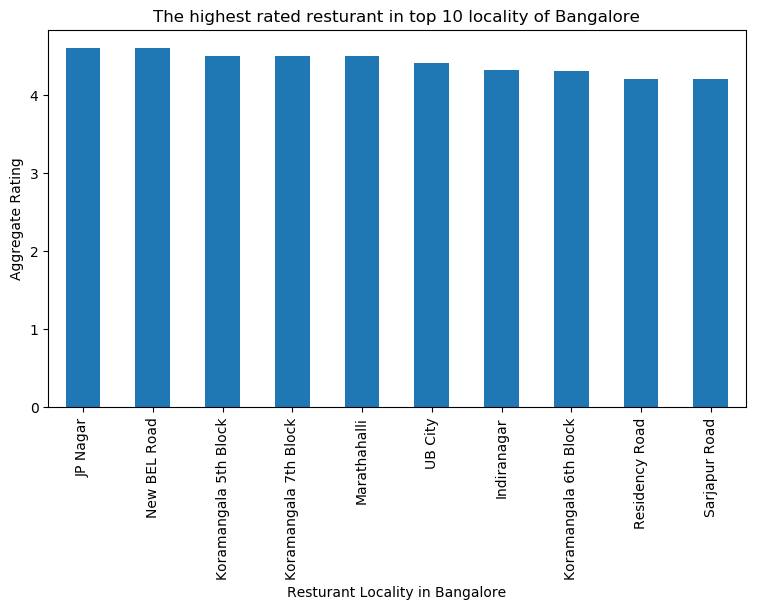

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Bangalore')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

**JP Nagar** has the highest rated restaurants

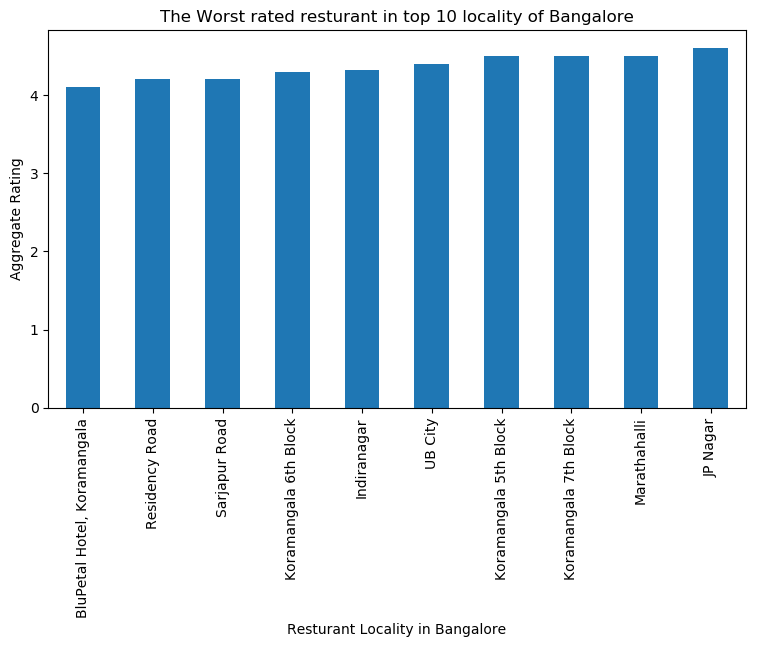

In [28]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Bangalore')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

**BluPetal Hotel, Koramangala** has the worst rated restaurants

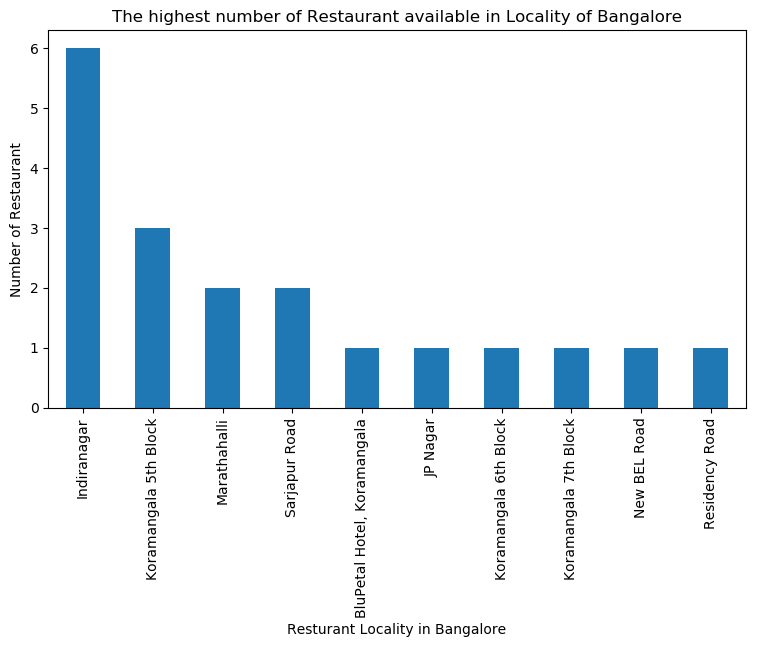

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Bangalore')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

**Indiranagar** has the largest number of restaurants

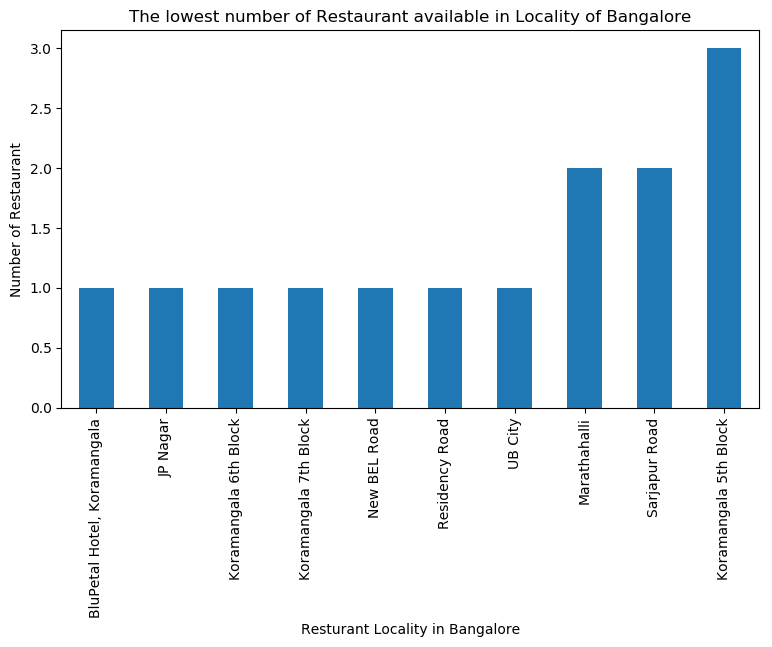

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Bangalore')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

**BluPetal, Koramangala** has least number of restaurants

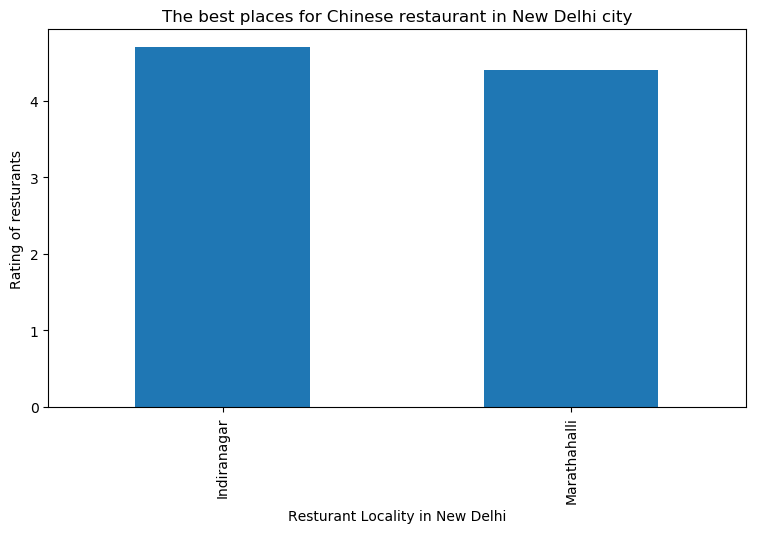

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Asian')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

**Indiranagar** and **Marathahalli** have the best Chinese Restaurants

### Visualizing the Restaurants on the Map

### Group Data based on Locality

In [34]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [35]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,1,"North Indian, Mughlai",4.100000,Very Good,2416
1,Indiranagar,12.976278,77.642775,6,"Asian, Italian, American, Pizza, European, Con...",4.316667,"Excellent, Good, Very Good",19834
2,JP Nagar,12.906229,77.596791,1,"Pizza, Cafe, Italian",4.600000,Excellent,781
3,Koramangala 5th Block,12.933947,77.615415,3,"Continental, American, Italian, North Indian, ...",4.500000,"Excellent, Very Good",15328
4,Koramangala 6th Block,12.939496,77.625999,1,"North Indian, Chinese, Italian, Street Food, D...",4.300000,Very Good,753


### Accessing the Foursquare API

In [36]:
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


In [37]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
Bangalore_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )


Bangalore_venues.head()

BluPetal Hotel, Koramangala
Indiranagar
JP Nagar
Koramangala 5th Block
Koramangala 6th Block
Koramangala 7th Block
Marathahalli
New BEL Road
Residency Road
Sarjapur Road
UB City


,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,Truffles Ice & Spice,12.933443,77.614265,Burger Joint
1,"BluPetal Hotel, Koramangala",12.933284,77.615428,Gilly's Rest-O-Bar,12.932987,77.614755,Bar
2,"BluPetal Hotel, Koramangala",12.933284,77.615428,XOOX Brewmill,12.935507,77.614982,Brewery
3,"BluPetal Hotel, Koramangala",12.933284,77.615428,IRepair India,12.934414,77.617646,Mobile Phone Shop
4,"BluPetal Hotel, Koramangala",12.933284,77.615428,Koramangala Social,12.935518,77.614097,Lounge


In [42]:
Bangalore_onehot = pd.get_dummies(Bangalore_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
Bangalore_onehot['Locality'] = Bangalore_venues['Locality'] 

# move Locality column to the first column
column_list = Bangalore_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
Bangalore_onehot = Bangalore_onehot[column_list]

Bangalore_onehot.head()

Bangalore_grouped = Bangalore_onehot.groupby('Locality').mean().reset_index()

num_top_venues = 5

for hood in Bangalore_grouped['Locality']:
    print("----"+hood+"----")
    temp = Bangalore_grouped[Bangalore_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BluPetal Hotel, Koramangala----
                  venue  freq
0     Indian Restaurant  0.16
1    Chinese Restaurant  0.06
2                  Café  0.05
3  Fast Food Restaurant  0.04
4          Dessert Shop  0.04


----Indiranagar----
               venue  freq
0               Café  0.13
1  Indian Restaurant  0.13
2                Pub  0.08
3             Lounge  0.05
4        Pizza Place  0.05


----JP Nagar----
                     venue  freq
0           Clothing Store  0.08
1                     Café  0.08
2  South Indian Restaurant  0.06
3              Coffee Shop  0.06
4                   Bakery  0.06


----Koramangala 5th Block----
                venue  freq
0   Indian Restaurant  0.16
1  Chinese Restaurant  0.06
2                Café  0.05
3              Lounge  0.04
4          Restaurant  0.04


----Koramangala 6th Block----
                           venue  freq
0                    Pizza Place  0.13
1                 Clothing Store  0.09
2                           Café  

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = Bangalore_grouped['Locality']

for ind in np.arange(Bangalore_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bangalore_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"BluPetal Hotel, Koramangala",Indian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant,Lounge,Restaurant,Dessert Shop,Bar,Coffee Shop,Bookstore
1,Indiranagar,Café,Indian Restaurant,Pub,Bakery,Chinese Restaurant,Pizza Place,Lounge,Dessert Shop,Restaurant,Ice Cream Shop
2,JP Nagar,Clothing Store,Café,Bakery,Pizza Place,South Indian Restaurant,Coffee Shop,Bar,Fast Food Restaurant,Mediterranean Restaurant,Brewery
3,Koramangala 5th Block,Indian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant,Lounge,Restaurant,Dessert Shop,Coffee Shop,Bar,Bookstore
4,Koramangala 6th Block,Pizza Place,Clothing Store,Café,South Indian Restaurant,General Entertainment,Gym / Fitness Center,Gastropub,Ice Cream Shop,Indian Restaurant,Italian Restaurant
5,Koramangala 7th Block,Indian Restaurant,Dessert Shop,Chinese Restaurant,Lounge,Ice Cream Shop,Café,Bookstore,Coffee Shop,Shopping Mall,Restaurant
6,Marathahalli,Indian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Food Court,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Donut Shop
7,New BEL Road,Ice Cream Shop,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Coffee Shop,Burger Joint,German Restaurant,Halal Restaurant,Italian Restaurant
8,Residency Road,Café,Indian Restaurant,Pub,Bar,Hotel,Lounge,Coffee Shop,Pizza Place,Clothing Store,Chinese Restaurant
9,Sarjapur Road,Indian Restaurant,Café,Vegetarian / Vegan Restaurant,South Indian Restaurant,Brewery,Coffee Shop,Eastern European Restaurant,Grocery Store,Ice Cream Shop,Lounge


### Clustering of the Venues

In [57]:
kclusters = 4

Bangalore_clustering = Bangalore_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bangalore_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

Bangalore_merged = df_final.head(240)
Bangalore_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
Bangalore_merged = Bangalore_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

Bangalore_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,1,"North Indian, Mughlai",4.100000,Very Good,2416,2,Indian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant,Lounge,Restaurant,Dessert Shop,Bar,Coffee Shop,Bookstore
1,Indiranagar,12.976278,77.642775,6,"Asian, Italian, American, Pizza, European, Con...",4.316667,"Excellent, Good, Very Good",19834,2,Café,Indian Restaurant,Pub,Bakery,Chinese Restaurant,Pizza Place,Lounge,Dessert Shop,Restaurant,Ice Cream Shop
2,JP Nagar,12.906229,77.596791,1,"Pizza, Cafe, Italian",4.600000,Excellent,781,3,Clothing Store,Café,Bakery,Pizza Place,South Indian Restaurant,Coffee Shop,Bar,Fast Food Restaurant,Mediterranean Restaurant,Brewery
3,Koramangala 5th Block,12.933947,77.615415,3,"Continental, American, Italian, North Indian, ...",4.500000,"Excellent, Very Good",15328,2,Indian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant,Lounge,Restaurant,Dessert Shop,Coffee Shop,Bar,Bookstore
4,Koramangala 6th Block,12.939496,77.625999,1,"North Indian, Chinese, Italian, Street Food, D...",4.300000,Very Good,753,3,Pizza Place,Clothing Store,Café,South Indian Restaurant,General Entertainment,Gym / Fitness Center,Gastropub,Ice Cream Shop,Indian Restaurant,Italian Restaurant


In [58]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Bangalore_merged['Lat'], Bangalore_merged['Lng'], Bangalore_merged['Locality'], Bangalore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Each of the Clusters

In [59]:
## Cluster 1
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 0, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,13.029198,4.6,Excellent,627,0,Ice Cream Shop,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Coffee Shop,Burger Joint,German Restaurant,Halal Restaurant,Italian Restaurant


In [60]:
## Cluster 2
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 1, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,12.962655,4.5,"Excellent, Very Good",7890,1,Indian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Food Court,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Donut Shop


In [61]:
## Cluster 3
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 2, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12.933284,4.100000,Very Good,2416,2,Indian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant,Lounge,Restaurant,Dessert Shop,Bar,Coffee Shop,Bookstore
1,12.976278,4.316667,"Excellent, Good, Very Good",19834,2,Café,Indian Restaurant,Pub,Bakery,Chinese Restaurant,Pizza Place,Lounge,Dessert Shop,Restaurant,Ice Cream Shop
3,12.933947,4.500000,"Excellent, Very Good",15328,2,Indian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant,Lounge,Restaurant,Dessert Shop,Coffee Shop,Bar,Bookstore
5,12.935662,4.500000,Excellent,1288,2,Indian Restaurant,Dessert Shop,Chinese Restaurant,Lounge,Ice Cream Shop,Café,Bookstore,Coffee Shop,Shopping Mall,Restaurant
8,12.972532,4.200000,Very Good,334,2,Café,Indian Restaurant,Pub,Bar,Hotel,Lounge,Coffee Shop,Pizza Place,Clothing Store,Chinese Restaurant
9,12.913652,4.200000,"Excellent, Good",6110,2,Indian Restaurant,Café,Vegetarian / Vegan Restaurant,South Indian Restaurant,Brewery,Coffee Shop,Eastern European Restaurant,Grocery Store,Ice Cream Shop,Lounge


In [62]:
## Cluster 3
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 3, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,12.906229,4.6,Excellent,781,3,Clothing Store,Café,Bakery,Pizza Place,South Indian Restaurant,Coffee Shop,Bar,Fast Food Restaurant,Mediterranean Restaurant,Brewery
4,12.939496,4.3,Very Good,753,3,Pizza Place,Clothing Store,Café,South Indian Restaurant,General Entertainment,Gym / Fitness Center,Gastropub,Ice Cream Shop,Indian Restaurant,Italian Restaurant
10,12.972161,4.4,Very Good,754,3,Italian Restaurant,Café,Lounge,Mexican Restaurant,Clothing Store,Hotel,Coffee Shop,Restaurant,Electronics Store,Cocktail Bar


### This Dataset has limited entries. Check out my repository for an updated Dataset with more entries, soon.